# OPTICAL CHARACTER RECOGNITION 

**OCR = *Optical Character Recognition***. In other words, OCR systems transform a two-dimensional image of text, that could contain machine printed or handwritten text from its image representation into machine-readable text. OCR as a process generally consists of several sub-processes to perform as accurately as possible. The subprocesses are:

    * Preprocessing of the Image
    * Text Localization
    * Character Segmentation
    * Character Recognition
    * Post Processing
The sub-processes in the list above of course can differ, but these are roughly steps needed to approach automatic character recognition. In OCR software, it’s main aim to identify and capture all the unique words using different languages from written text characters.
    
<body>
    <img src="OCR.jpg" style="width:400px;height:190px">
</body>

## OCR with Pytesseract and OpenCV

 **Pytesseract** : *Pytesseract is a wrapper for Tesseract-OCR Engine. It is also useful as a stand-alone invocation script to tesseract, as it can read all image types supported by the Pillow and Leptonica imaging libraries, including jpeg, png, gif, bmp, tiff, and others.* <br><br>
 **OpenCV** : *OpenCV (Open Source Computer Vision Library) is a library of programming functions mainly aimed at real-time computer vision. This is an open source library that includes several hundreds of computer vision algorithms*

In [1]:
import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [2]:
pytesseract.pytesseract.tesseract_cmd = "C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

In [3]:
img = cv2.imread('Capture.JPG')

### Preprocessing for Tesseract

In [4]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

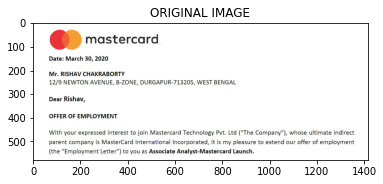

In [5]:
# Plot original image

b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('ORIGINAL IMAGE')
plt.show()

In [6]:
# Preprocess image 

gray = get_grayscale(img)
thresh = thresholding(gray) 
opening = opening(thresh)
canny = canny(opening)
images = {'gray': gray, 
          'thresh': thresh, 
          'opening': opening, 
          'canny': canny}

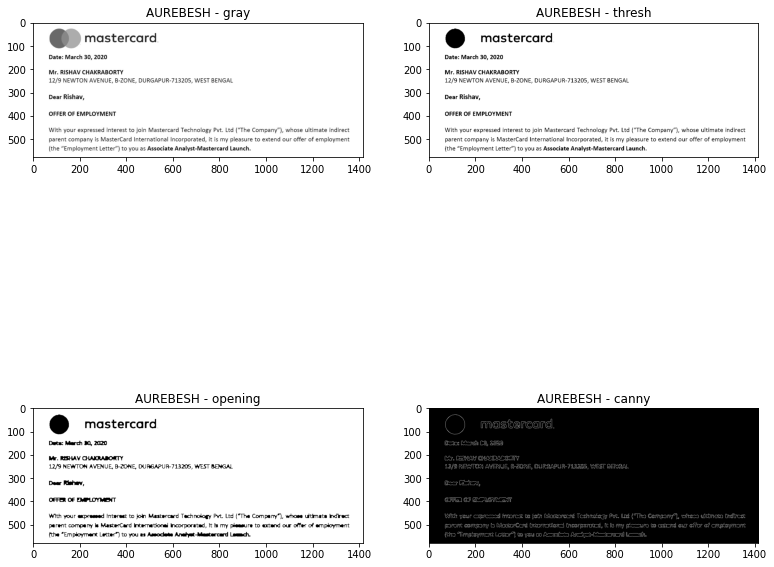

In [7]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('AUREBESH - ' + keys[i]) 
    plt.imshow(images[keys[i]], cmap='gray')

In [8]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(img, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(images[keys[1]], config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(images[keys[2]], config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(images[keys[3]], config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
© mastercard

Date: March 30, 2020

Mr. RISHAV CHAKRABORTY

12/9 NEWTON AVENUE, B-ZONE, DURGAPUR-713205, WEST BENGAL

Dear Rishav,

OFFER OF EMPLOYMENT

With your expressed interest to join Mastercard Technology Pvt. Ltd (“The Company”), whose ultimate indirect
parent company is MasterCard International Incorporated, it is my pleasure to extend our offer of employment
(the “Employment Letter”) to you as Associate Analyst-Mastercard Launch.

-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
© mastercard.

Date: March 30, 2020

Mr. RISHAV CHAKRABORTY

12/9 NEWTON AVENUE, B-ZONE, DURGAPUR-713205, WEST BENGAL

Dear Rishav,

OFFER OF EMPLOYMENT

With your expressed interest to join Mastercard Technology Pvt. Ltd (“The Company”), whose ultimate indirect
parent company is MasterCard International Incorp

### Bounding box information using Pytesseract

While running an image through the tesseract OCR engine, pytesseract allows you to get bounding box imformation

    - on a character level
    - on a word level
    - based on a regex template

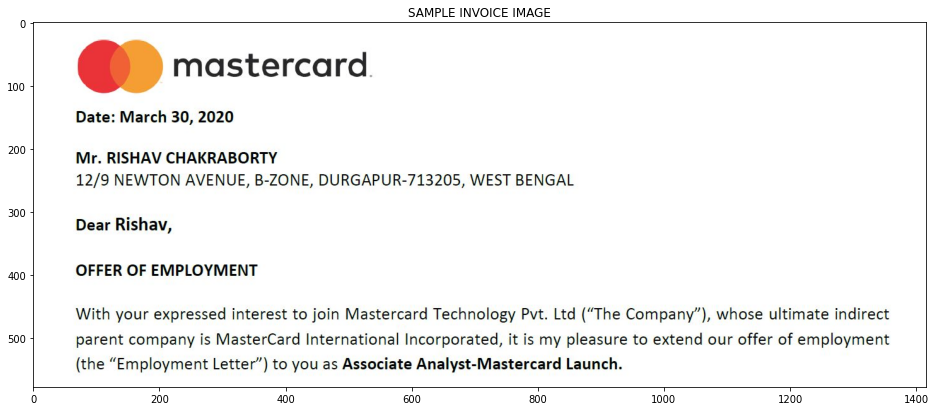

In [9]:
# Plot original image

image = cv2.imread('Capture.JPG')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE IMAGE')
plt.show()

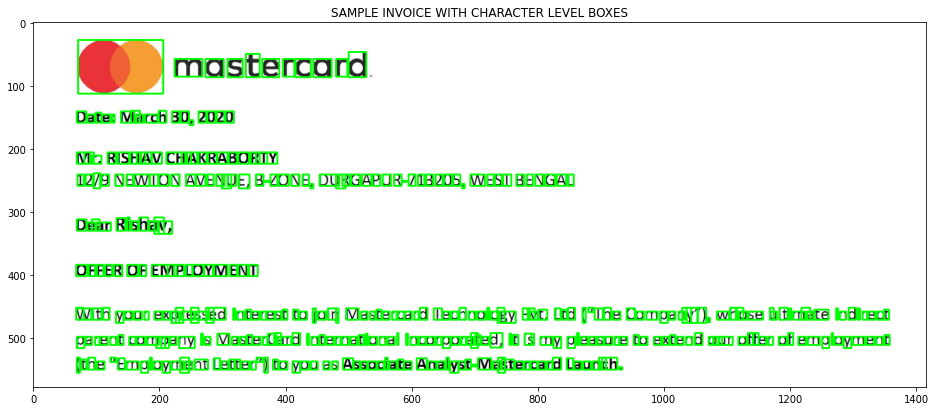

In [10]:
# Plot character boxes on image using pytesseract.image_to_boxes() function

h, w, c = image.shape
boxes = pytesseract.image_to_boxes(image) 
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH CHARACTER LEVEL BOXES')
plt.show()

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


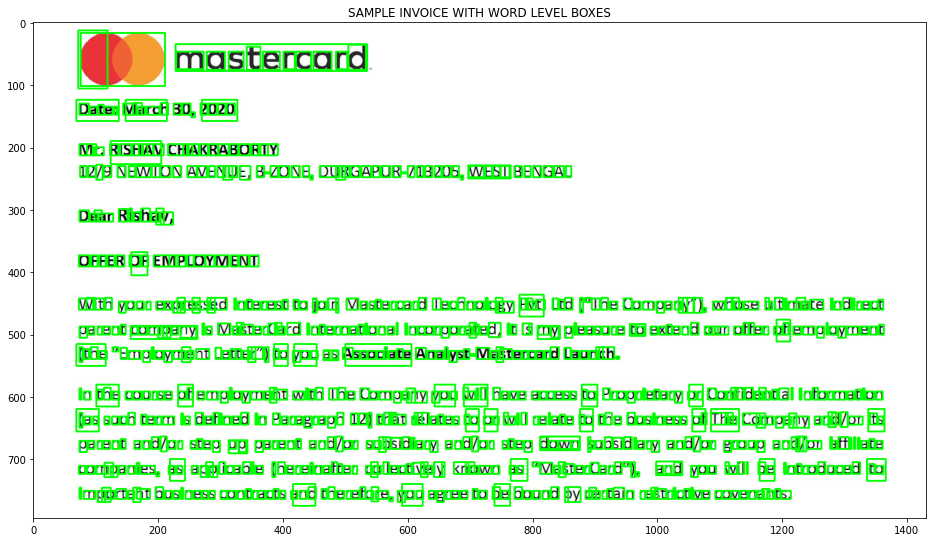

In [17]:

# Plot word boxes on image using pytesseract.image_to_data() function

d = pytesseract.image_to_data(image, output_type=Output.DICT)
print('DATA KEYS: \n', d.keys())

n_boxes = len(d['text'])
for i in range(n_boxes):
    # condition to only pick boxes with a confidence > 60%
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH WORD LEVEL BOXES')
plt.show()